In [1]:
from anthropic import Anthropic
import itertools
import os
from pathlib import Path
%load_ext autoreload

In [2]:
client = Anthropic(
    api_key=os.getenv("ANTHROPIC_API_KEY")
)
# model = "claude-3-haiku-20240307"
model = "claude-3-5-sonnet-20240620"

In [3]:
prompts, responses, dataset_names = [], [], []
plot_file = Path("plot.py")

In [4]:
def compile_msg_history(prompts: list[str], responses: list[str]):
    """ Transforms lists of messages into a message history usable by the Anthropic API as the `messages` parameter. """
    return [{"role": "user" if i==0 else "assistant", "content": val if val else ""} for pair in itertools.zip_longest(prompts, responses) for i, val in enumerate(pair)]

## Data + Plot: Dummy

In [5]:
dataset_names.append('GDP_growth')
prompts.append(
    "Generate data in CSV format. "
    "Output only the data without any other text. "
    "The data has 3 columns labeled 'China', 'USA', and 'Russia' tracking GDP in USD from 1980 until 2020. "
    "The values in each column are generally increasing in a jagged fashion, but 'China' is increasing most quickly. "
    "The values should be of a realistic magnitude for the countries labeled."
    "The first column of the data is the year."
    "The data includes a header row with the column titles."
    )
gen_data = client.messages.create(
    model=model,
    max_tokens=1000,
    messages=compile_msg_history(prompts, responses)
)
responses.append(gen_data.content[0].text)
print(responses[-1])

Year,China,USA,Russia
1980,305.35,2857.31,462.21
1981,288.94,3207.03,467.38
1982,280.66,3343.79,473.56
1983,302.71,3634.04,489.72
1984,311.35,4037.61,503.81
1985,309.49,4339.00,511.97
1986,300.76,4579.63,527.31
1987,329.00,4855.22,542.89
1988,407.36,5236.44,551.13
1989,455.69,5641.58,563.28
1990,360.86,5963.14,516.81
1991,383.37,6158.13,509.38
1992,426.92,6520.33,460.21
1993,445.27,6858.56,435.06
1994,564.32,7287.09,395.53
1995,734.55,7639.75,395.53
1996,863.75,8073.12,391.72
1997,961.60,8577.55,404.93
1998,1029.04,9062.82,270.95
1999,1094.00,9630.66,195.91
2000,1211.35,10252.35,259.71
2001,1339.40,10581.82,306.60
2002,1470.55,10936.42,345.47
2003,1660.29,11458.24,430.35
2004,1955.35,12213.73,591.02
2005,2285.97,13036.64,764.02
2006,2752.13,13814.61,989.93
2007,3550.34,14451.86,1299.71
2008,4594.31,14712.84,1660.85
2009,5101.70,14448.93,1222.64
2010,6087.16,14992.05,1524.92
2011,7551.50,15542.58,2051.66
2012,8532.23,16197.01,2210.26
2013,9570.41,16784.85,2297.13
2014,10475.68,17521.75,

In [6]:
# Write the content to a .csv file
data_file = Path("data")/(dataset_names[-1]+".csv")
with open(data_file, "w") as f:
    f.write(responses[-1])

In [17]:
plot_func = "plot_"+dataset_names[-1]
prompts.append(f"Write a python function called `{plot_func}` which creates a line graph of the data you generated. Use the matplotlib library with the seaborn-v0_8 style. The figure should be 5 inches wide with font size no smaller than 8. You first need to load the data from the `filename` argument. The graph should appear appropriate for an academic paper. Include a title, legend, axis labels, and tick labels. Save the plot as a png with the same name as the filename argument. Output only commented Python code without any ``` backticks surrounding it.")
gen_data = client.messages.create(
    model=model,
    max_tokens=1000,
    messages=compile_msg_history(prompts, responses)
)
if gen_data.content[0].text[:9] == "```python":
    responses.append(gen_data.content[0].text[9:-3])
else:
    responses.append(gen_data.content[0].text)
print(gen_data.content[0].text)

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_GDP_growth(filename):
    # Load the data from the CSV file
    data = pd.read_csv(filename)
    
    # Set the style to seaborn-v0_8 for an academic look
    plt.style.use('seaborn-v0_8')
    
    # Create a new figure with 5 inches width and appropriate height
    fig, ax = plt.subplots(figsize=(5, 4))
    
    # Plot the data for each country
    ax.plot(data['Year'], data['China'], label='China', linewidth=1.5)
    ax.plot(data['Year'], data['USA'], label='USA', linewidth=1.5)
    ax.plot(data['Year'], data['Russia'], label='Russia', linewidth=1.5)
    
    # Set the title and labels
    ax.set_title('GDP Growth (1980-2020)', fontsize=10, fontweight='bold')
    ax.set_xlabel('Year', fontsize=8)
    ax.set_ylabel('GDP (Billion USD)', fontsize=8)
    
    # Customize the tick labels
    ax.set_xticks(range(1980, 2021, 10))
    ax.set_xticklabels(range(1980, 2021, 10), rota

In [18]:
# Write the content to a .py file
with open(plot_file, "w") as f:
    f.write(responses[-1])
%autoreload complete

Path.replace() takes 2 positional arguments but 3 were given


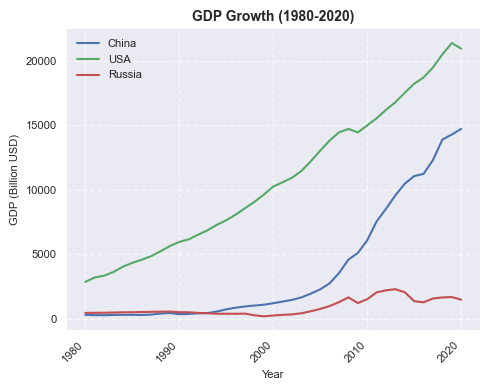

In [19]:
import plot

try:
    getattr(plot, plot_func)(data_file)
except Exception as e:
    print(e)
# plot.plot_GDP('data/GDP_growth.csv')
# plot.plot_GDP(fnames[-2])